# Utility Function

In [1]:
import numpy as np 
from decisionpy.utility import UtilityFunction, Alternative, Lotery
import matplotlib.pyplot as plt

## Default Utility function. Linear

In [2]:
u1 = UtilityFunction(name='linear')

u1.get_utility(np.arange(5))

array([0, 1, 2, 3, 4])

In [3]:
u2 = UtilityFunction(
    func = lambda x: -np.exp(-0.4*np.atleast_1d(x)),
    name='exp'
)

u2.get_utility(np.arange(5))

array([-1.        , -0.67032005, -0.44932896, -0.30119421, -0.20189652])

In [4]:
u3 = UtilityFunction(
    func = lambda x: np.log(np.atleast_1d(x)+4),
    name='log'
)

u3.get_utility(np.arange(5))

array([1.38629436, 1.60943791, 1.79175947, 1.94591015, 2.07944154])

In [5]:
u4 = UtilityFunction(
    func = lambda x: np.exp(0.2*np.atleast_1d(x)),
    name='exp2'
)
u4.get_utility(np.arange(5))

array([1.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093])

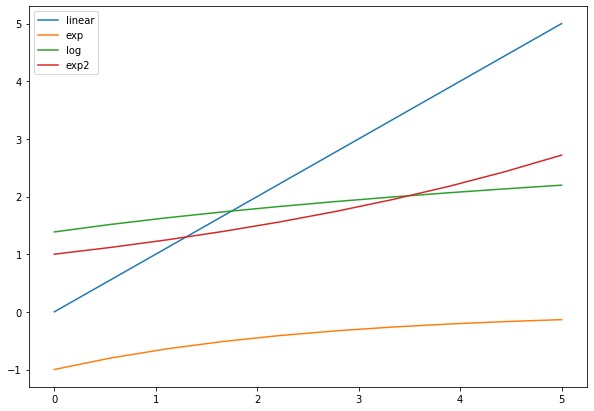

In [6]:
vals = np.linspace(0,5,10)
list_utilities = [u1,u2,u3,u4]

fig, ax = plt.subplots(figsize=(10,7))

for i in list_utilities:
    ax.plot(vals,i.get_utility(vals), label = i.name)

ax.legend()


## Loteries

In [7]:
a1 = Alternative(
    probability=0.5,
    value=0,
    name='first_alternative'
)

a2 = Alternative(
    probability=0.5,
    value=5,
    name='second_alternative'
)

lot1 = Lotery(
    alternatives=[a1,a2]
) 

In [8]:
### Lotery Expected Value

In [9]:
#expected Value
lot1.exp_value()

2.5

### Lotery Expected Utility Value

In [10]:
for i in list_utilities:
    print(lot1.exp_value_u(i))

2.5
-0.5676676416183064
1.791759469228055
1.8591409142295225


In [11]:
# Certainty Equivalent
for i in list_utilities:
    print(lot1.emc(i).root)


2.5
1.4155479237924318
2.0
3.1005725347913873


In [12]:
# Risk Premium
for i in list_utilities:
    print(lot1.risk_premium(i))

0.0
1.0844520762075682
0.5
-0.6005725347913873


In [13]:
b1 = Alternative(
    probability=0.5,
    value=0,
    name='first_alternative'
)

b2 = Alternative(
    probability=0.5,
    value=-3,
    name='second_alternative'
)

lot2 = Lotery(
    alternatives=[b1,b2]
) 

In [14]:
lot2.emc(u3)

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -1.999999999999996

In [15]:
lot2.exp_value_u(u3)

0.6931471805599453

In [16]:
c1 = Alternative(
    probability=0.5,
    value=0,
    name='first_alternative'
)

c2 = Alternative(
    probability=0.5,
    value=2,
    name='second_alternative'
)

lot3 = Lotery(
    alternatives=[c1,c2]
) 

u5 = UtilityFunction(
    func = lambda x: -np.exp(-2*np.atleast_1d(x)),
    name='exp'
)

u5.get_utility(np.arange(5))

array([-1.00000000e+00, -1.35335283e-01, -1.83156389e-02, -2.47875218e-03,
       -3.35462628e-04])

In [17]:
lot3.emc(u5)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 0.33749862632109384

In [21]:
lot3.exp_value()

1.0

In [20]:
lot3.purchase_price(u4)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.0993403592000361